###  Implementing a CNN using the TensorFlow Keras API

#### Configuring CNN layers in Keras

 * **Conv2D:** tf.keras.layers.Conv2D
   * filters
   * kernel_size
   * strides
   * padding
   
   
 * **MaxPool2D:** tf.keras.layers.MaxPool2D
   * pool_size
   * strides
   * padding
   
   
 * **Dropout** tf.keras.layers.Dropout2D
   * rate

In [2]:
! pip install tensorflow-datasets

In [9]:
import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
## MNIST dataset

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

dict_keys(['test', 'train'])


In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [13]:
import tensorflow as tf

### Constructing a CNN in Keras

In [16]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))


In [17]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [18]:
    model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [19]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [20]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))


TensorShape([16, 10])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        51264     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 148s 186ms/step - loss: 0.1373 - accuracy: 0.9573 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 2/20
782/782 [==============================] - 142s 180ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 3/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 4/20
782/782 [==============================] - 142s 180ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 5/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 6/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 7/20
782/782 [==============================] - 141s 180ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0443 -

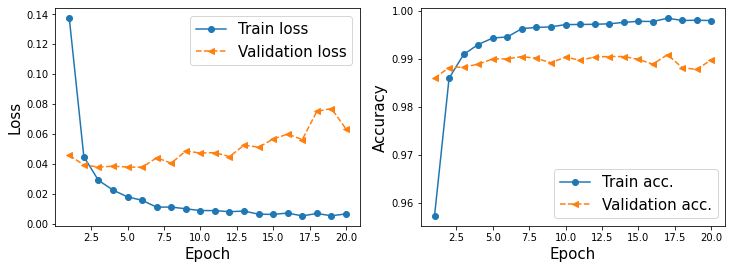

In [24]:
import numpy as np
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [25]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 10s 19ms/step - loss: 0.0409 - accuracy: 0.9923

Test Acc. 99.23%


TensorShape([20, 10])


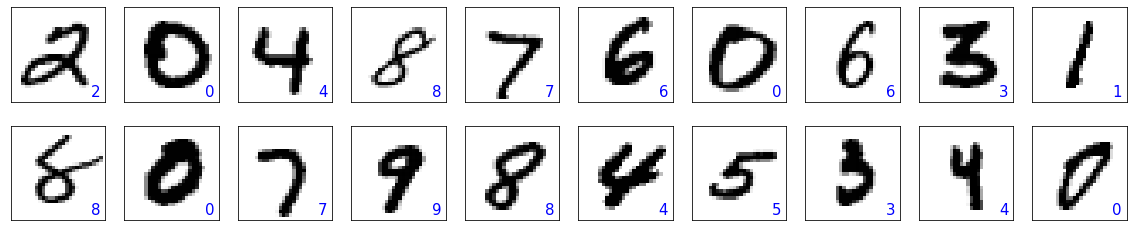

In [29]:
batch_test = next(iter(mnist_test.batch(20)))

preds = model(batch_test[0])

tf.print(preds.shape)

preds = tf.argmax(preds, axis=1)
#print(preds)

fig = plt.figure(figsize=(20, 4))
for i in range(20):
    ax = fig.add_subplot(2,10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
#plt.show()

2


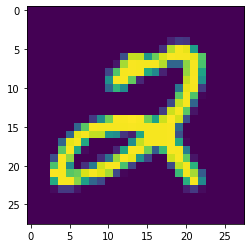

In [30]:
tuple=next(iter(mnist_test))
plt.imshow(tuple[0][:,:,0])
print(tuple[1].numpy())

In [31]:
import tensorflow as tf

Ds=iter(mnist_test.batch(1))
c=0
for i in range (1000):

   batch_test=next(Ds)
   preds=model(batch_test[0])
   preds=tf.argmax(preds, axis=1)
   if preds[0].numpy() != batch_test[1][0].numpy(): 
     c =c+1
     tf.print(i)
     print(c)

30
1
98
2
226
3
454
4
588
5
659
6
871
7
941
8


Found a mistake for element 30
predicted value 0 true, value: 9
Found a mistake for element 98
predicted value 1 true, value: 7
Found a mistake for element 226
predicted value 0 true, value: 2
Found a mistake for element 454
predicted value 6 true, value: 0
Found a mistake for element 588
predicted value 9 true, value: 8
Found a mistake for element 659
predicted value 1 true, value: 2
Found a mistake for element 871
predicted value 2 true, value: 8
Found a mistake for element 941
predicted value 2 true, value: 8


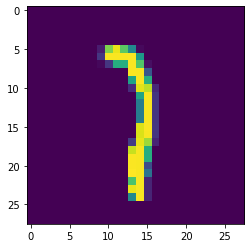

In [32]:
ds = iter(mnist_test.batch(1))
count = 0

for i in range(1000):
   batch_test = next(ds)
   preds = model(batch_test[0])
   preds = tf.argmax(preds, axis=1)
   if preds[0].numpy() != batch_test[1][0].numpy():
      count += 1
      print('Found a mistake for element', i)
      tf.print('predicted value', preds[0], 'true, value:', batch_test[1][0])
      if count == 2:
          plt.imshow(batch_test[0][0, :, :, 0])

In [33]:
import os

if not os.path.exists('models'):
    os.mkdir('models')


model.save('models/mnist-cnn.h5')